# **PHY 472 Final Project**

In [125]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Qobj, Bloch, basis, ket, tensor
import seaborn as sns
sns.set_theme(style="whitegrid") 
%matplotlib inline

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

print("Imports Successful")

Imports Successful


### *By Ishaan Pathak & Patrick Govan*

# **1. The Problem**

For our final project we are going to be discussing how we can use QisKit, a quantum computing python package, to demonstrate the use of Shors algorithm and its overall supremacy over any classical factorization approach. you may be asking yourselves, "Why do we care about shors algorithm?" Well, theres a simple explination and a complex explination; lets start simple:
### Simple:
- It allows us the ability to factor massive numbers very quickly.

### Complex:
- The use of shors algorithm is not just pertinent to science and math in factoring the product of two large prime integers in polynomeal time, but also to our cyber security. Just about every transaction that we use, whether its buying something off amazon or using your credit card at the store, is based off of a public-key cryptosystem called Rivest–Shamir–Adleman, or RSA. The bulk of security that backs the RSA system is based on the practicle difficulty of factoring two large prime integers. With the implimentation of shors algorithm on a quantum computer, it could theoretically deconstruct RSA encryption keys within seconds as compared to weeks if not months on a normal computer. This is a massive issue in todays society as cash is being reduced and crypto purchases are skyrocketing, meaning that all of the data surrounding our money that we use on a daily basis, can be hacked into with ease simply by using Shors Algorithm.

### More Background Info:
Constructed in 1994 by American mathematician Peter Shor, Shors algorithm runs in polynomial time (the time taken is polynomial in **log _(N)_**, the size of the integer given as input). Specifically, it takes quantum gates of order **O((log _N_^2)(log log _N_)(log log log _N_))** using fast multiplication, thus demonstrating that the integer-factorization problem can be efficiently solved on a quantum computer. This is almost exponentially faster than the most efficient known classical factoring algorithm, the general number field sieve, which works in sub-exponential time. Something thats pretty interesting is that Shor's Algorithm was also a powerful motivator for the design and construction of quantum computers, and for the study of new quantum-computer algorithms. It has also facilitated research on new cryptosystems that are secure from quantum computers, collectively called post-quantum cryptography. 


# **2. Theory/Model/Approach**

Before we dive deeper into explaining what Shor's algorithm is, it is important we break down the more fundametal moving parts in a general Quantum System. Starting with:

###  **2.1 Superposition States**

Time evolved quantum mechanical state vectors are mostly periodic in nature and can be visualized as being a classical wave (since they have a $\sin$ component or a $\cos$ component or both. The principle of Quantum Superposition states that quantum states can be added together ("superimposed" on one another) and the result will be another valid quantum state.

The reverse of this statement is also true meaning, we can represent any given quantum state as the sum of two or more valid quantum states. This principle can also be visualized mathematically by taking a look at the Schrödinger equation in Matrix form. 

$$\hat{\mathcal{H}}{\psi} = {E}{\psi}$$

is also a linear relation meaning it follows the additive property of matrices in accordance with Linear Algebra. This can be shown as:

$$\hat{\mathcal{H}}{\psi} = {E}({\psi_1 + \psi_2 + ... + \psi_n})$$

Here, ${\psi_1 + \psi_2 + ... + \psi_n}$ are all distinct and valid quantum states.

An example of a physically observable manifestation of the wave nature of quantum systems is the interference peaks from an electron beam in a double-slit experiment. 
The superposition principle is at the heart of the design of Qubits which are used to carry out quantum computations.

### **2.2 A Qubit**

The fundamental building block at the heart of all quantum computational systems is the Qubit. A Qubit may be thought of as being analogous to a bit used in classical computing where, each bit has a fixed 0 or 1 value. In the case of classical computation, information is conveyed using combinations of these 0's and 1's of a set length which are encoded in a pre-determined format (for example, ASCII and UTF-8 among other). This binary information is processed by low level programming languages (like, assembly language etc.) which act as in interface between binary (machine code) and a computer language interpretable by humans.


On the other hand, in the case of quantum computation, information is stored as Qubits. A Qubit is usually a two-level quantum system that is made as a result of 2 basis states $∣0⟩$ and $∣1⟩$ (in the z-basis) being in quantum superposition. What makes a Qubit special and more versatile is the fact that using techniques like Superdense Coding, a single Qbit can store data equivalent to that stored in 2 classical bits. Meaning, if a process requires n-bits of data as a starting point, that information could be stored as $n$ classical bits or $n/2$ to $n/2 + 1$ Qubits! This property of Qubits being nearly twice as efficient at storing data than regular holds a lot of promise as transistor sizes have continually shrunk (in accordance with Moor's Law) and are nearing the physical limitations of transistor design.

The Superposition state encoded in a Qubit may be written as:
$$|\psi⟩ = \alpha|0⟩ + \beta|1⟩$$
which is the normalized representation of the state $∣\psi⟩$. The normalization condition states that, $|\alpha |^{2} + |\beta |^{2} = 1$. Since, $|\psi⟩$ is normalized, this value of $|\psi⟩$ can be alternatively represented in spherical co-ordinates as:

$$\alpha = \cos{\frac{\theta}{2}}$$
$$\beta = e^{i \phi} \sin{\frac{\theta}{2}}$$

where, $\theta \in (0, \pi)$ and, $\phi \in (0, 2\pi)$ and the radius of the 'Bloch Sphere This representation is rather convenient because it allows each superposition state to be represented in the form of a vector on a 'Bloch Sphere' as shown below:

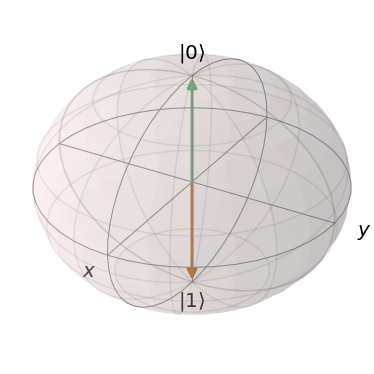

In [126]:
b = Bloch()
up = ket("0")
down = ket("1")
b.add_states([up, down])
b.show()

### Hadamard Gate

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

The following code visualizes the 2 output states, $|+\rangle$ (green) ,and $|-\rangle$ (orange)

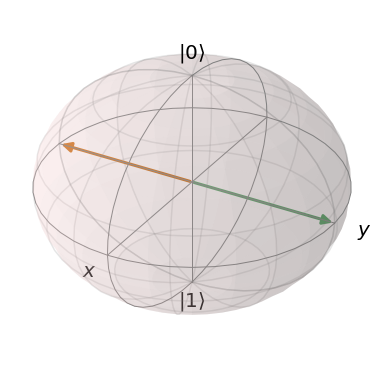

In [127]:
b = Bloch()

b0 = (up+(0+1j)*down)/np.sqrt(2)  # (|0> + |1>) / √2 (green)
b1 = (up-(0+1j)*down)/np.sqrt(2)  # (|0> - |1>) / √2 (orange)

b.add_states([b0, b1])
b.show()

The Hamard Gates in the Quantum Circuits (shown in later sections of this assignment) are represent using the library Qiskit. They are visually represented on the circuit as elements that look as follows:

In [128]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

### Greatest Common Denominator and the Chinese Remainder Theorem

In algebra, the greatest common divisor (abbreviated as GCD) of two polynomials is a polynomial, of the highest possible degree, that is a factor of both the two original polynomials. This concept is analogous to the greatest common divisor of two integers.


In the important case of univariate polynomials over a field the polynomial GCD may be computed, like for the integer GCD, by the Euclidean algorithm using long division. The polynomial GCD is defined only up to the multiplication by an invertible constant.

The similarity between the integer GCD and the polynomial GCD allows extending to univariate polynomials all the properties that may be deduced from the Euclidean algorithm and Euclidean division. Moreover, the polynomial GCD has specific properties that make it a fundamental notion in various areas of algebra. Typically, the roots of the GCD of two polynomials are the common roots of the two polynomials, and this provides us information on the roots without computing them. For example, the multiple roots of a polynomial are the roots of the GCD of the polynomial and its derivative, and further GCD computations allow computing the square-free factorization of the polynomial, which provides polynomials whose roots are the roots of a given multiplicity of the original polynomial.

The greatest common divisor may be defined and exists for multivariate polynomials over a field or the ring of integers, and also over a unique factorization domain. There exist algorithms to compute them as soon as one has a GCD algorithm in the ring of coefficients. These algorithms proceed by a recursion on the number of variables to reduce the problem to a variant of the Euclidean algorithm. They are a fundamental tool in computer algebra, because computer algebra systems use them systematically to simplify fractions. Conversely, most of the modern theory of polynomial GCD has been developed to satisfy the need for efficiency of computer algebra systems.

#### Euclid's Algorithm:

Factoring polynomials can be difficult, especially if the polynomials have a large degree. The Euclidean algorithm is a method that works for any pair of polynomials. It makes repeated use of Euclidean division. When using this algorithm on two numbers, the size of the numbers decreases at each stage. With polynomials, the degree of the polynomials decreases at each stage. The last nonzero remainder, made monic if necessary, is the GCD of the two polynomials.
More specifically, for finding the gcd of two polynomials a(x) and b(x), one can suppose b ≠ 0 (otherwise, the GCD is a(x)), and
$deg(b(x)) \leq deg(a(x))$


The Euclidean division provides two polynomials q(x), the quotient and r(x), the remainder such that

$a(x)=q_{0}(x)b(x)+r_{0}(x)\qquad {\text{and}}\qquad \deg(r_{0}(x))<\deg(b(x))$

A polynomial g(x) divides both a(x) and b(x) if and only if it divides both b(x) and r0(x). Thus

$\gcd(a(x),b(x))=\gcd(b(x),r_{0}(x))$

Setting:

$a_{1}(x)=b(x),b_{1}(x)=r_{0}(x)$

one can repeat the Euclidean division to get new polynomials q1(x), r1(x), a2(x), b2(x) and so on. At each stage we have
deg
⁡
$\deg(a_{k+1})+\deg(b_{k+1})<\deg(a_{k})+\deg(b_{k}),$
so the sequence will eventually reach a point at which and one has got the GCD:


$\displaystyle \gcd(a,b)=\gcd(a_{1},b_{1})=\cdots =\gcd(a_{N},0)=a_{N}.$

### Quantum Fourier Transform

A Quantum Fourier Transform as the name suggests is the quantum analog of a Fourier Transform. In broad terms, the function of a QFT gate in a Quantum Circuit is to transform the input state vector from time domain over into the frequency domain. The output data may be represented as a histogram corresponding to the probabilities of the measured quantum states. Mathematically, for a single Qubit, the Quantum Fourier Transform fuction is written as:

$$\vert x \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle$$

Or the unitary matrix:


$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert$$

The quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states $|0\rangle$ and $|1\rangle$ to the X-basis states $|{+}\rangle$ and $|{-}\rangle$. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

$$
|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

(We often note states in the Fourier basis using the tilde (~)).

The example above demonstrates a very useful form of the QFT for $N=2^n$. Note that only the last qubit depends on the values of all the other input qubits and each further bit depends less and less on the input qubits. This becomes important in physical implementations of the QFT, where nearest-neighbor couplings are easier to achieve than distant couplings between qubits.

Additionally, as the QFT circuit becomes large, an increasing amount of time is spent doing increasingly slight rotations. It turns out that we can ignore rotations below a certain threshold and still get decent results, this is known as the approximate QFT. This is also important in physical implementations, as reducing the number of operations can greatly reduce decoherence and potential gate errors.  

# **Demonstrating Shors Algorithm using N=15**

#### 1. all of the libraries needed for this example were imported above.

#### 2. The next step requires us to set up the quantum circuitry (we aren't going to go in depth on the quantum circuitry as there's too much information on quantum gates needed to properly construct this code) 

- In this example we will solve the period finding problem for **a=7** and **N=15**. We provide the circuits for **U** where: **U|y⟩=|ay mod15⟩** without explanation. To create **U<sup>x</sup>**, we will simply repeat the circuit **x** times. The function **c_amod15** returns the controlled-U gate for **a**, repeated power times.

In [129]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

#### 3. We Need to Specify Our Variables.

- For our example, we are going to be using 8 counting qubits.

In [130]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

#### 4. We will Now Be Importing The Circuit For The Quantum Fourier Transformation.

In [131]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

#### 5. Now We Can Actually Construct The Circuitry Needed For Shores Algorithm.

In [132]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialise counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      ┌───┐│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

#### 6. Lets Take A Look At The Results We Measured.

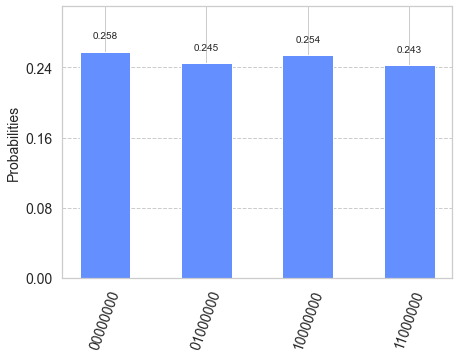

In [133]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

#### 7. We Have 3 Qubits, These Results Correspond To Measured Phases Of:

In [134]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  01000000(bin) =  64(dec)   64/256 = 0.25


#### 8. We Can Now Use The Continued Fractions Algorithm To Attempt To Find _**s**_ And _**r**_, Luckily For Us, Python Has This Functionality Built In:

In [135]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

#### 9.  We Can Use The _**.limit_denominator()**_ Method To Get The Fraction That Most Closely Resembles Our Float, With The Denominator Below A Certain Value:

In [136]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

#### 10. The Order _**(r)**_ Must Be Less Than _**N**_, So We Will Set The Maximum Denominator To Be 15:

In [137]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.00      0/1            1
2   0.75      3/4            4
3   0.25      1/4            4


#### 11. Getting Into The Actual Example Starting With Initilizing The Number That We Want To Factor

In [138]:
N = 15

#### 12. The Next Step Is To Choose A Random Number, _**x**_, Between _**1**_ And _**N−1**_:

In [139]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


#### 13. Now We'll Quickly Check It Isn't Already A Non-Trivial Factor Of _**N**_:

In [140]:
from math import gcd # greatest common divisor
gcd(a, N)

1

#### 14. Next, We Do Shor's Order Finding Algorithm For _**a = 7**_ And _**N = 15**_

In [141]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialise counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    qasm_sim = Aer.get_backend('qasm_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, qasm_sim)
    obj = assemble(t_qc, shots=1)
    result = qasm_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

#### 15. Part A) From This Phase, We Can Easily Find A Guess For _**r**_

In [142]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 11000000
Corresponding Phase: 0.750000


Fraction(3, 4)

#### 15. Part B)

In [143]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


#### 16. Now We Have _**r**_, We Might Be Able To Use This To Find A Factor Of _**N**_

In [144]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


#### 17. The Cell Below Repeats The Algorithm Until At Least One Factor Of _**15**_ Is Found:

In [145]:
start = time.perf_counter()

a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)


Attempt 1:
Register Reading: 11000000
Corresponding Phase: 0.750000
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***
Elapsed 2.336 seconds.


# **Presenting Our Results**

Analyzing Algorithms...


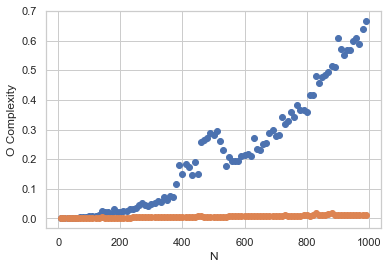

In [147]:
from matplotlib import pyplot
import numpy as np
import timeit
from functools import partial
import random

def fsquare(N):
    """
    O(n^2) function
    """
    for i in range(N):
        for j in range(N):
            x = i*j

def flog(N):
    for i in range(N):
        np.log(N)

def plotTC(fn, nMin, nMax, nInc, nTests):
    """
    Run timer and plot time complexity
    """
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    p1 = pyplot.plot(x, y, 'o')


# main() function
def main():
    print('Analyzing Algorithms...')
    plotTC(fsquare, 10, 1000, 10, 10)
    plotTC(flog, 10,1000,10,10)
    pyplot.xlabel('N')
    pyplot.ylabel('O Complexity')
    pyplot.show()

if __name__ == '__main__':
    main()

From the graph above, using relativly simple equations, we can see that the computation time for an exponetial function (blue) drastically grows as the number of bits is increased, whereas the logrithmic function has a steady O-complexity as the number of bits is increased. This is important to note as Shors Algorithm is based on polynomial time and similar factorization algorithms are based on sub-exponential time. Due to the fact that a fully functioning quantum computer is years from flurition, we couldnt actually calculate the time complexity for Shor's Algorithm against any comparable algorithm. Therefore we had to resort to using a simple graph representing theoretical time complexity. 

# **Findings on Shors Algorithm**

### Results

Due to our limitations described below, we are unable to gather actual data regarding the computation time as QisKit is only a quantum cumputing enviornment simulator with no actual adjustment to computational times. Therefore, we instead decided to reference S. M. Hamdi, S. T. Zuhori, F. Mahmud and B. Pal's paper in which they used the Beckman-Chari-Devabhaktuni-Preskill (BCDP) modular exponentiation algorithm with various clock rates and compared it to classical computers running the general number field sieve (GNFS). Attached is a copy of their data in which they graph the computational time requiered to the amount of bits the algorithm is attempting to deconstruct.

<img src="O-time.PNG">

### Limitations

- The main limitation the we as a group faced is the fact that we're running shors algorithm on a normal computer instead of the intended quantum computer. In terms of results this could heavily skew our data by showing identicle computation time with a classical approach as compared to Shors approach. For our data, we were only using a python extension called QisKit, which just contructs theoreticle quantum gates and qubits, but isn't able to actually speed up the computation time.  

- Another unique limitation that was faced during data aquisition is how, if ran on a quantum computer, there is a high error rate. This is due to the fact that quantum computers are very sensative, and any type of interference with the computer itself could cause the qubit to decoher, causing a complete loss of information from the decoherent qubit. With normal computers, the ones we all use, there is a computational accuracy of 100%, but with a quantum computer its theorized that it would be roughly 80% due to outside noise and interference. 

### Future Direction

- Due to Shor's Algorithm, many advancments have been made regarding quantum computing. The first of these advancments is the demonstration by a group at IBM, who factored _**15**_ into _**3 * 5**_, using an NMR implementation of a quantum computer with 7 qubits. Following IBM, two more, independent groups implemented Shor's algorithm using photonic qubits, emphasizing that multi-qubit entanglement was observed when running the Shor's algorithm circuits. In 2012, the factorization of _**15**_ was performed with solid-state qubits. Also, in 2012, the factorization of _**21**_ was achieved, setting the record for the largest integer factored with Shor's algorithm

- One of the most promising directions that Shor's Algorithm has created is a new field of cryptography called **Post-Quantum Cryptogrophy**. Post-quantum cryptography refers to cryptographic algorithms (usually public-key algorithms) that are thought to be secure against a cryptanalytic attack by a quantum computer. The spur in research is due to the fact that normal public-key algorithm security relies on one of three hard mathematical problems: the integer factorization problem (as displayed above), the discrete logarithm problem or the elliptic-curve discrete logarithm problem. All of these problems can be easily solved on a sufficiently powerful quantum computer running Shor's algorithm. Instead of public-key algorithms, Post-quantum cryptography studies the use of a couple of new variations of cryptography: Lattice-based cryptography, Multivariate cryptography, Hash-based cryptography, Code-based cryptography and Symmetric key quantum resistance.   

# **References**

1. https://arxiv.org/abs/quant-ph/0205095 
2. https://qiskit.org/textbook/ch-algorithms/shor.html#6.-References
3. M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000). (Page 633)
4. III. Breaking RSA Encryption with a Quantum Computer: Shor's Factoring Algorithm, Lecture notes on Quantum computation, Cornell University, Physics 481–681, CS 483; Spring, 2006 by N. David Mermin. Last revised 2006-03-28, 30 page PDF document.
5. Boneh, Dan (1999). "Twenty Years of attacks on the RSA Cryptosystem". Notices of the American Mathematical Society. 46 (2): 203–213.
6. P. Shor, Polynomial-Time Algorithms for Prime Factorization and Dis- crete Logarithms on a Quantum Computer,SIAM J.Sci.Statist.Comput. 26 (1997) 1484
7. S. M. Hamdi, S. T. Zuhori, F. Mahmud and B. Pal, "A Compare between Shor's quantum factoring algorithm and General Number Field Sieve," 2014 International Conference on Electrical Engineering and Information & Communication Technology, 2014, pp. 1-6